### Customer Segmentaton 
This repository contains an in-depth analysis of customer segmentation using both K-means and Hierarchical clustering algorithms on a large dataset of over 1 million transactions. The objective is to segment bank customers based on their transaction behaviors and account attributes to derive actionable insights and enhance marketing strategies.

In [1]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [2]:
# Load the data
dataset = pd.read_csv(r"C:\Users\MUQEET\Downloads\bank_transactions.csv")
dataset.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
dataset.shape

(1048567, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
# Percentage of null values
round(100*dataset.isnull().sum()/len(dataset),2)

TransactionID              0.00
CustomerID                 0.00
CustomerDOB                0.32
CustGender                 0.10
CustLocation               0.01
CustAccountBalance         0.23
TransactionDate            0.00
TransactionTime            0.00
TransactionAmount (INR)    0.00
dtype: float64

In [6]:
# Drop rows with missing values
dataset = dataset.dropna()
dataset.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [7]:
# Datetime columns

dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'], dayfirst=True, errors='coerce')
dataset['CustomerDOB'] = pd.to_datetime(dataset['CustomerDOB'], dayfirst=True, errors='coerce')

# Check for any remaining non-datetime entries
print(dataset[['TransactionDate', 'CustomerDOB']].dtypes)
print(dataset[['TransactionDate', 'CustomerDOB']].isnull().sum())

TransactionDate    datetime64[ns]
CustomerDOB        datetime64[ns]
dtype: object
TransactionDate    0
CustomerDOB        0
dtype: int64


In [8]:
# Checking numerical columns and their variance 
pd.options.display.float_format = '{:.2f}'.format
dataset.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614.00,1041614,1041614.00,1041614.00
mean,1984-06-16 16:48:28.882561088,114998.61,2016-08-25 04:47:02.533492224,157122.12,1566.10
min,1800-01-01 00:00:00,0.00,2016-08-01 00:00:00,0.00,0.00
25%,1983-08-17 00:00:00,4728.14,2016-08-12 00:00:00,124041.00,160.00
50%,1988-10-10 00:00:00,16768.52,2016-08-25 00:00:00,164247.00,457.50
75%,1992-07-01 00:00:00,57428.85,2016-09-06 00:00:00,200022.00,1200.00
max,2073-12-31 00:00:00,115035495.10,2016-10-21 00:00:00,235959.00,1560034.99
std,NaN,846760.94,NaN,51263.52,6561.46


- min DOB is 1800-1-1
- max DOB is 2073-12-31

In [10]:
# Droping rows where CustomerDOB is 1800
dataset = dataset.drop(dataset[dataset['CustomerDOB'] == '1/1/1800'].index, axis=0)

# Modify 'CustomerDOB' where the year is 2024 or later
dataset.loc[dataset.CustomerDOB.dt.year >= 2024, 'CustomerDOB'] = dataset.loc[dataset.CustomerDOB.dt.year >= 2024, 'CustomerDOB'] - pd.DateOffset(years=100)

# Calculate age
dataset['CustomerAge'] = ((pd.to_datetime('today') - dataset['CustomerDOB']).dt.days / 365.25).round(0)

dataset.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00,31.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,67.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.00,28.00
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.00,51.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50,36.00


In [11]:
dataset.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00,31.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,67.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.00,28.00
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.00,51.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50,36.00


In [12]:
# Reading categorical columns
print(dataset['CustLocation'].value_counts())
print('\n')
print(dataset['CustGender'].value_counts())

CustLocation
MUMBAI                       97679
BANGALORE                    77751
NEW DELHI                    76380
GURGAON                      70518
DELHI                        67335
                             ...  
KAMALPUR                         1
JUFFAIR                          1
CHAKALA ANDHERI -E MUMBAI        1
CORPORATION THANE                1
IMPERIA THANE WEST               1
Name: count, Length: 8164, dtype: int64


CustGender
M    712454
F    272868
Name: count, dtype: int64


### EXPLORATORY DATA ANALYSIS (EDA)

In [13]:
df = dataset.copy()

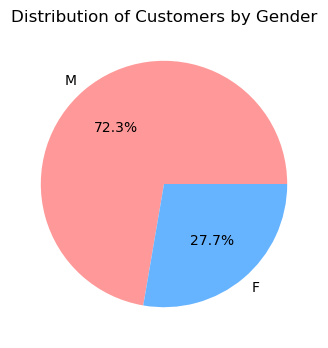

In [14]:
# Calculate the counts for each gender category
gender_counts = df['CustGender'].value_counts()
# Plot the pie chart
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Customers by Gender')
plt.show()

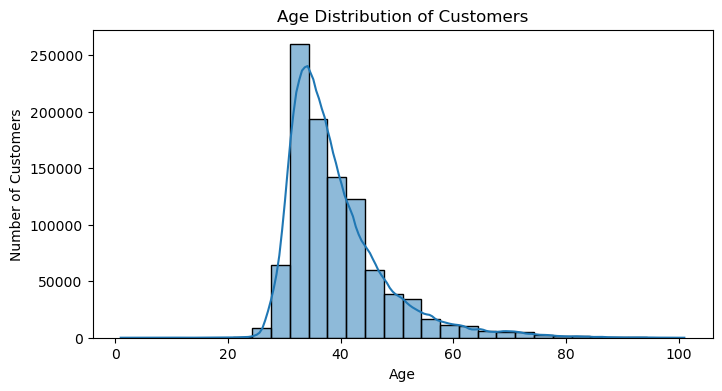

In [15]:
# Age distribution of customers based on "CustomerDOB" column
plt.figure(figsize = [8,4])
sns.histplot(df['CustomerAge'], bins = 30,  kde = True )
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

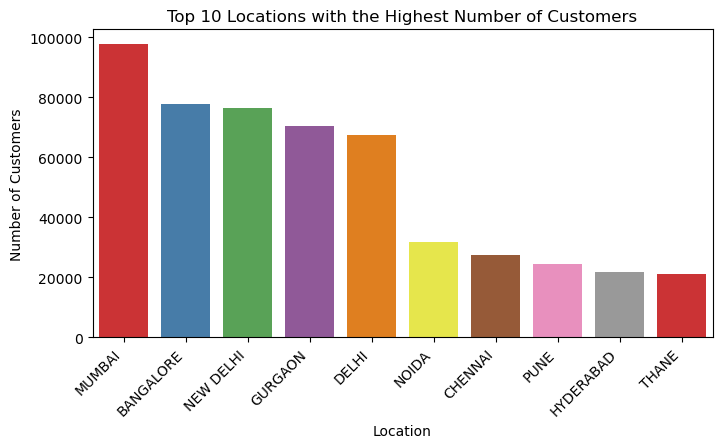

In [16]:
# Location with the highest number of customers (CustLocation)
location_counts = df['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='Set1')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

### Checking Outliers Using BOXPLOT

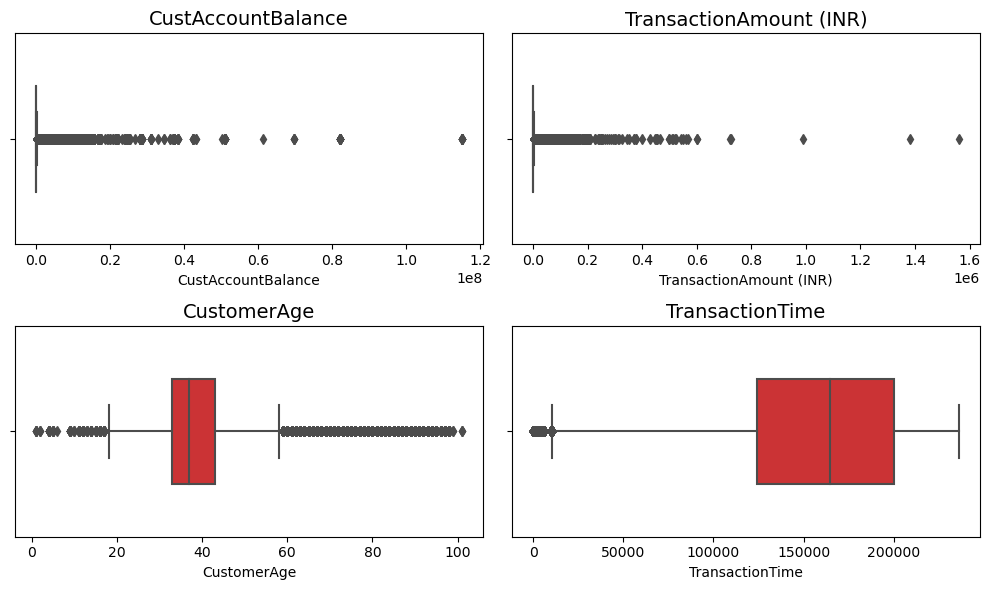

In [17]:
# Create a single figure for all subplots
plt.figure(figsize=(10, 6))

# CustAccountBalance
plt.subplot(2, 2, 1)  # 2x2 grid, first subplot
sns.boxplot(data=df, x='CustAccountBalance', palette='Set1', width=0.5)
plt.title('CustAccountBalance', fontsize=14)

# TransactionAmount (INR)
plt.subplot(2, 2, 2)  # 2x2 grid, second subplot
sns.boxplot(data=df, x='TransactionAmount (INR)', palette='Set1', width=0.5)
plt.title('TransactionAmount (INR)', fontsize=14)

# CustomerAge
plt.subplot(2, 2, 3)  # 2x2 grid, third subplot
sns.boxplot(data=df, x='CustomerAge', palette='Set1', width=0.5)
plt.title('CustomerAge', fontsize=14)

# TransactionHour
plt.subplot(2, 2, 4)  # 2x2 grid, fourth subplot
sns.boxplot(data=df, x='TransactionTime', palette='Set1', width=0.5)
plt.title('TransactionTime', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [18]:
# Treating outliers 
def handle_outliers_iqr(data, numeric_features):
    for column in numeric_features:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data                                     # Capping (also known as winsorization)

# Define numeric features
numeric_features = ['CustAccountBalance', 'TransactionAmount (INR)']

# Apply outlier handling to each numeric feature
df = handle_outliers_iqr(df, numeric_features)

In [19]:
# lower and upper cap values
lower_cap = 18
upper_cap = 80

# Cap the values
df['CustomerAge'] = df['CustomerAge'].clip(lower=lower_cap, upper=upper_cap)

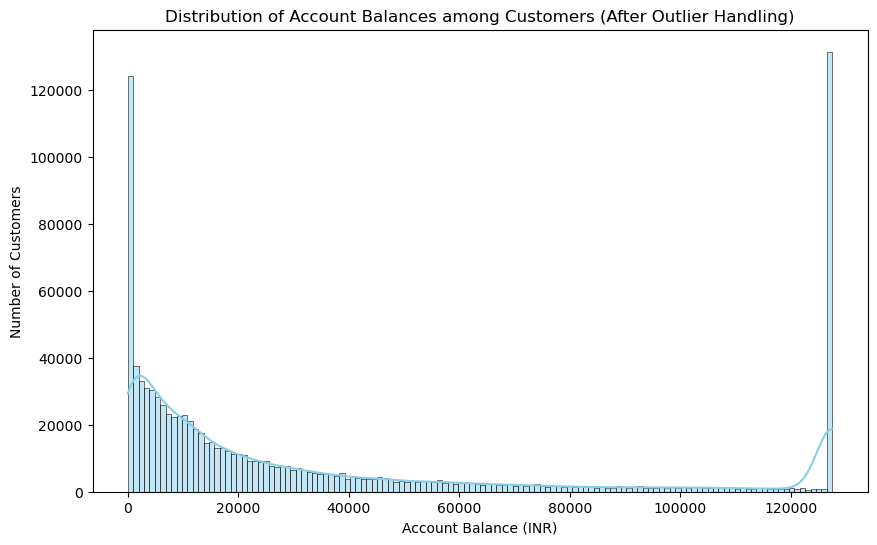

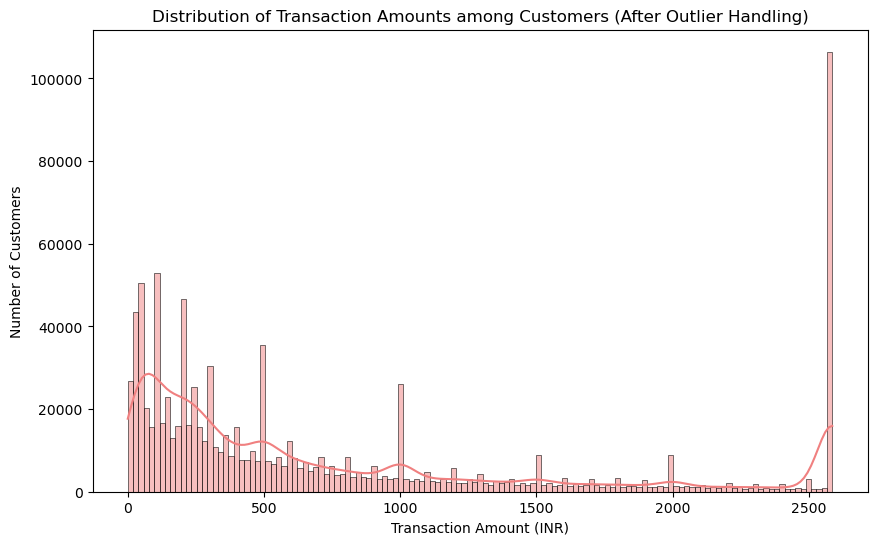

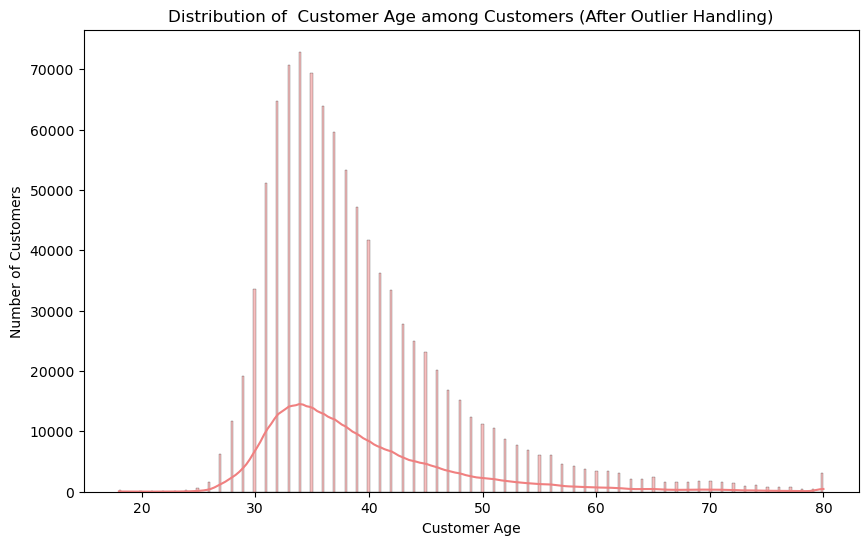

In [20]:
# Distribution of account balances (CustAccountBalance) among customers
plt.figure(figsize=(10, 6))
sns.histplot(df['CustAccountBalance'], kde=True, color='skyblue')
plt.title('Distribution of Account Balances among Customers (After Outlier Handling)')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of transaction amounts (TransactionAmount (INR)) among customers
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount (INR)'], kde=True, color='lightcoral')
plt.title('Distribution of Transaction Amounts among Customers (After Outlier Handling)')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of Customer Age among customers
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], kde=True, color='lightcoral')
plt.title('Distribution of  Customer Age among Customers (After Outlier Handling)')
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.show()


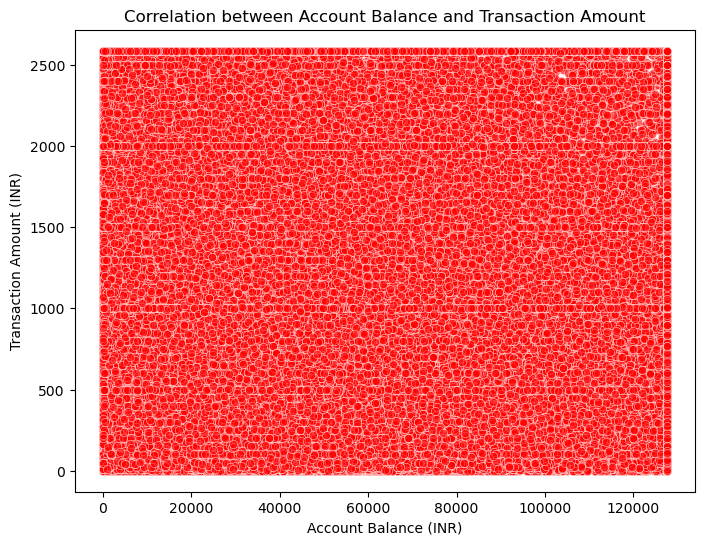

In [21]:
# Correlation between customer account balance and transaction amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df, color='red', alpha=0.6)
plt.title('Correlation between Account Balance and Transaction Amount')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Transaction Amount (INR)')
plt.show()

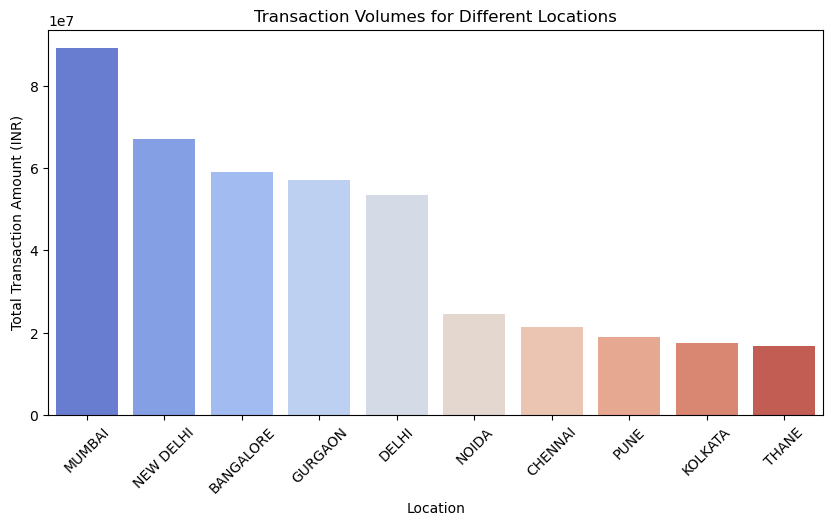

In [22]:
# CUSTOMER LOCATION VS TRANSACTION AMOUNT

location_transaction_volumes = df.groupby('CustLocation')['TransactionAmount (INR)'].sum().nlargest(10).sort_values(ascending = False)

# Visualize the transaction volumes for each location using a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=location_transaction_volumes.index, y=location_transaction_volumes.values, palette='coolwarm')
plt.title('Transaction Volumes for Different Locations')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

### RMF ANALYSIS
Calculate RFM Metrics:

- Recency: Calculate the number of days since each customer's last purchase.
- Frequency: Count the number of transactions for each customer.
- Monetary: Sum the total amount spent by each customer.

In [23]:
# Find the most recent transaction date
current_date = df['TransactionDate'].max()

# Calculate Recency, Frequency, and Monetary metrics
rfm_data = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Recency: Days since last purchase
    'TransactionID': 'count',  # Frequency: Number of transactions
    'TransactionAmount (INR)': 'sum'  # Monetary: Total amount spent
})

# Rename columns for clarity
rfm_data.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

# Display the resulting RFM DataFrame
print(rfm_data)


            Recency  Frequency  Monetary
CustomerID                              
C1010011         25          2   2942.00
C1010012         68          1   1499.00
C1010014         75          2   1455.00
C1010018         36          1     30.00
C1010024         64          1   2586.00
...             ...        ...       ...
C9099836         75          1    691.00
C9099877         36          1    222.00
C9099919         64          1    126.00
C9099941         54          1     50.00
C9099956         26          1    855.00

[839081 rows x 3 columns]


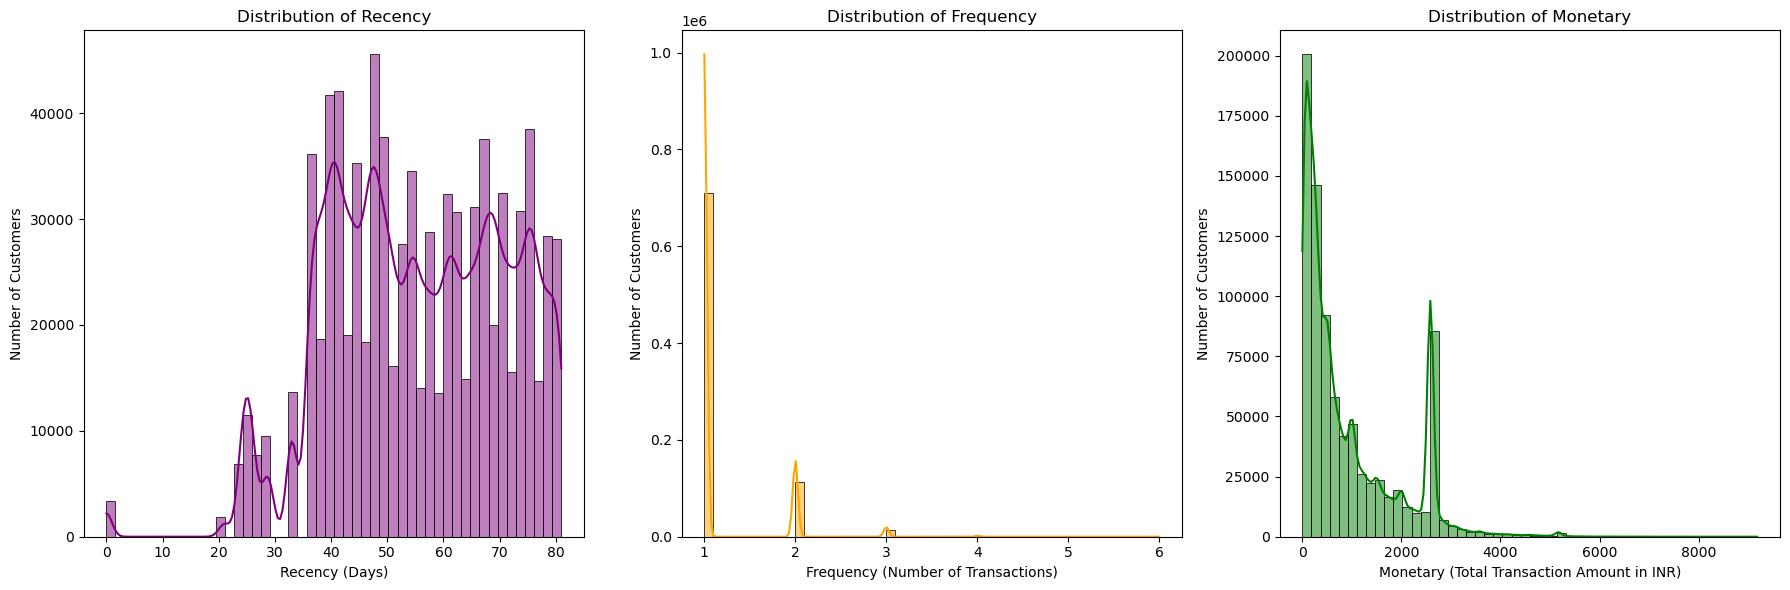

In [24]:
# Visualize the distributions of RFM features

# Create a figure with subplots for Recency, Frequency, and Monetary
plt.figure(figsize=(18, 6))

# Plot Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_data['Recency'], bins=50, kde=True, color='purple')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')

# Plot Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_data['Frequency'], bins=50, kde=True, color='orange')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')

# Plot Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_data['Monetary'], bins=50, kde=True, color='green')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary (Total Transaction Amount in INR)')
plt.ylabel('Number of Customers')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### DATA PREPROCESSING

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CustGender'] = le.fit_transform(df['CustGender'])
df['CustLocation'] = le.fit_transform(df['CustLocation'])
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-01-10,0,3117,17819.05,2016-08-02,143207,25.00,31.00
1,T2,C2142763,1957-04-04,1,3174,2270.69,2016-08-02,141858,2586.00,67.00
2,T3,C4417068,1996-11-26,0,4625,17874.44,2016-08-02,142712,459.00,28.00
3,T4,C5342380,1973-09-14,0,4625,127524.50,2016-08-02,142714,2060.00,51.00
4,T5,C9031234,1988-03-24,0,4965,6714.43,2016-08-02,181156,1762.50,36.00


In [26]:
df = df.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'], axis = 1)
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,0,3117,17819.05,25.00,31.00
1,1,3174,2270.69,2586.00,67.00
2,0,4625,17874.44,459.00,28.00
3,0,4625,127524.50,2060.00,51.00
4,0,4965,6714.43,1762.50,36.00


In [27]:
# Removing Transaction amount = 0

df[df['TransactionAmount (INR)'] == 0].count()

df = df.drop(df[df['TransactionAmount (INR)'] == 0].index, axis = 0)

In [28]:
from sklearn.preprocessing import StandardScaler

columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=columns_names)
scaled_df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,-1.62,-0.23,-0.43,-0.91,-0.94
1,0.62,-0.20,-0.79,2.15,3.21
2,-1.62,0.49,-0.43,-0.39,-1.29
3,-1.62,0.49,2.06,1.52,1.37
4,-1.62,0.66,-0.69,1.17,-0.36


### DATA MODELLING

In [29]:

# Extract relevant columns for Customer Age and Transaction Amount
data_age_transaction = scaled_df[['CustomerAge', 'TransactionAmount (INR)']].values

# Extract relevant columns for CustLocation and Transaction Amount
data_location_transaction = scaled_df[['CustLocation', 'TransactionAmount (INR)']].values


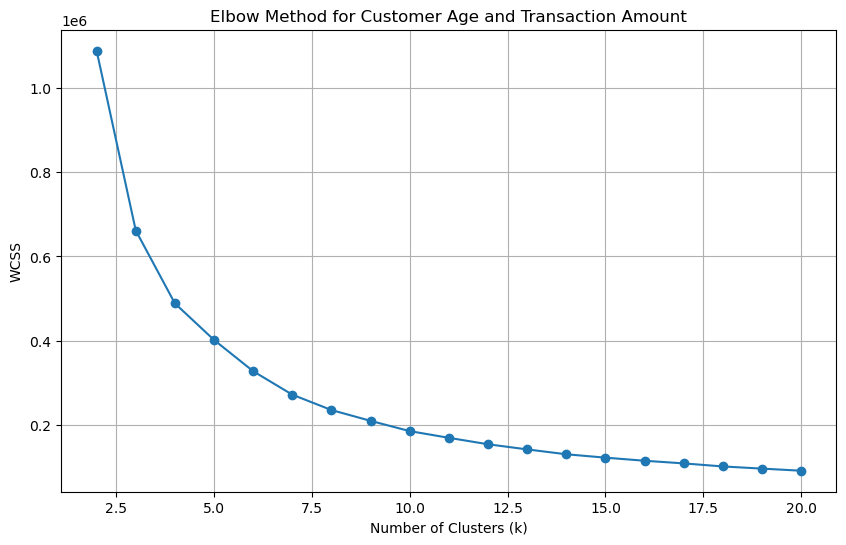

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range for k
k_range = range(2, 21)
wcss_age_transaction = []

# Calculate WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data_age_transaction)
    wcss_age_transaction.append(kmeans.inertia_)

# Plot the elbow curve for Age and Transaction Amount
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_age_transaction, marker='o')
plt.title('Elbow Method for Customer Age and Transaction Amount')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


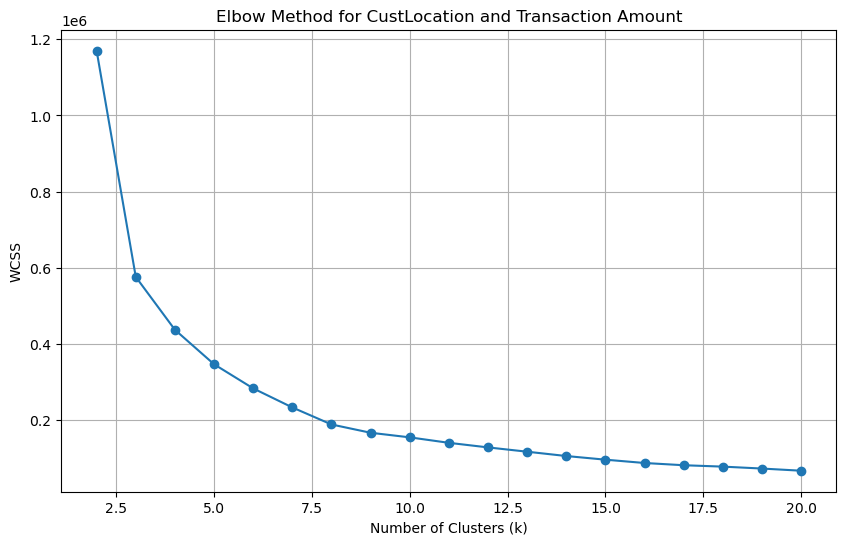

In [31]:
wcss_location_transaction = []

# Calculate WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data_location_transaction)
    wcss_location_transaction.append(kmeans.inertia_)

# Plot the elbow curve for Location and Transaction Amount
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_location_transaction, marker='o')
plt.title('Elbow Method for CustLocation and Transaction Amount')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()




In [32]:
num_clusters_age_transaction = 6  # Update this based on the elbow method result

# Initialize and fit KMeans
kmeans_age_transaction = KMeans(n_clusters=num_clusters_age_transaction, init='k-means++', n_init=10, random_state=42)
kmeans_labels_age_transaction = kmeans_age_transaction.fit_predict(data_age_transaction)
centroids_age_transaction = kmeans_age_transaction.cluster_centers_

# Add cluster labels to the DataFrame
scaled_df['Cluster_Age_Transaction'] = kmeans_labels_age_transaction



In [33]:
num_clusters_location_transaction = 7  # Update this based on the elbow method result

# Initialize and fit KMeans
kmeans_location_transaction = KMeans(n_clusters=num_clusters_location_transaction, init='k-means++', n_init=10, random_state=42)
kmeans_labels_location_transaction = kmeans_location_transaction.fit_predict(data_location_transaction)
centroids_location_transaction = kmeans_location_transaction.cluster_centers_

# Add cluster labels to the DataFrame
scaled_df['Cluster_Location_Transaction'] = kmeans_labels_location_transaction


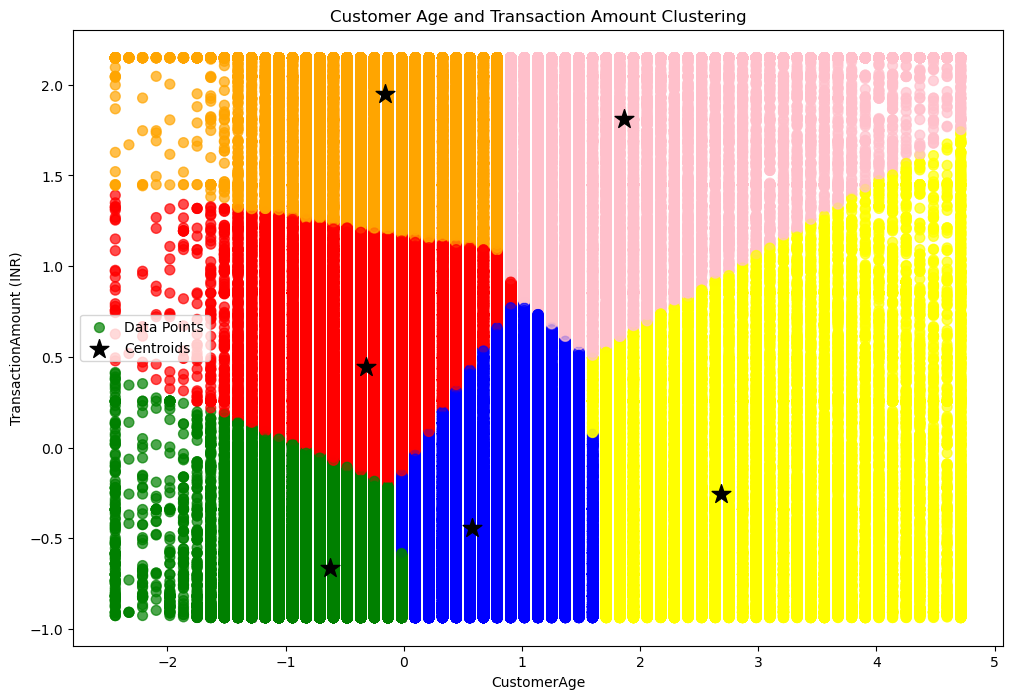

In [34]:
colors_age_transaction = ['red', 'yellow', 'blue', 'green', 'orange','pink']

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(scaled_df['CustomerAge'], scaled_df['TransactionAmount (INR)'],
            c=scaled_df['Cluster_Age_Transaction'].map({i: colors_age_transaction[i] for i in range(num_clusters_age_transaction)}),
            s=50, alpha=0.7, label='Data Points')

# Plot the centroids
plt.scatter(centroids_age_transaction[:, 0], centroids_age_transaction[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.title('Customer Age and Transaction Amount Clustering')
plt.xlabel('CustomerAge')
plt.ylabel('TransactionAmount (INR)')
plt.legend()
plt.show()


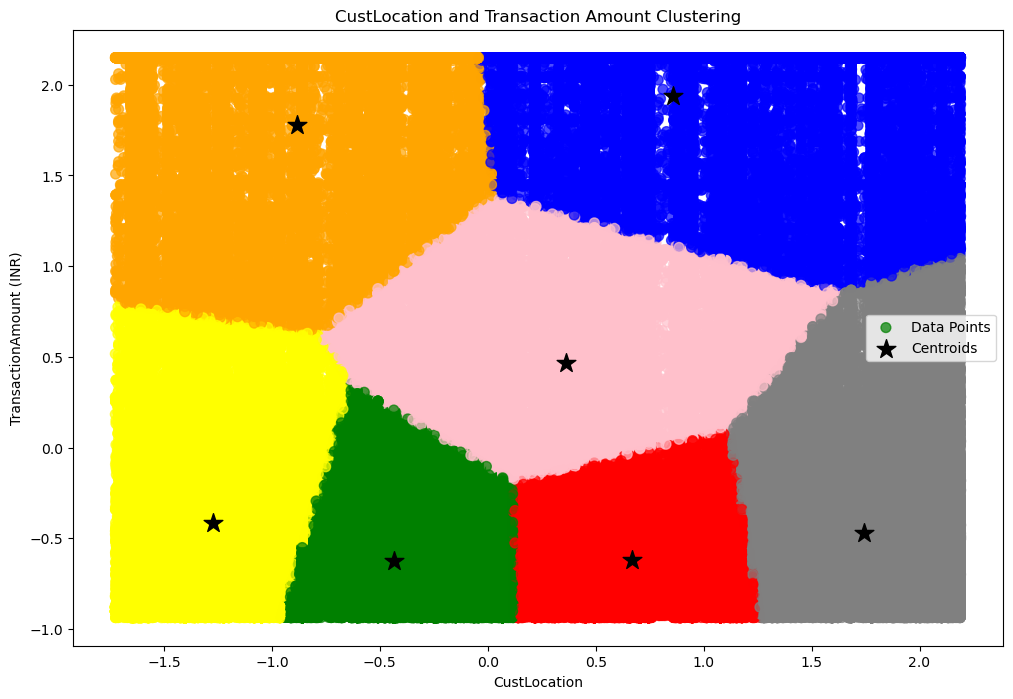

In [35]:
colors_location_transaction = ['red', 'yellow', 'blue', 'green', 'orange', 'pink', 'grey']

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(scaled_df['CustLocation'], scaled_df['TransactionAmount (INR)'],
            c=scaled_df['Cluster_Location_Transaction'].map({i: colors_location_transaction[i] for i in range(num_clusters_location_transaction)}),
            s=50, alpha=0.7, label='Data Points')

# Plot the centroids
plt.scatter(centroids_location_transaction[:, 0], centroids_location_transaction[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.title('CustLocation and Transaction Amount Clustering')
plt.xlabel('CustLocation')
plt.ylabel('TransactionAmount (INR)')
plt.legend()
plt.show()


In [36]:
from sklearn.metrics import silhouette_score
# Sample a subset of the data for faster computation
sampled_df = scaled_df.sample(frac=0.2, random_state=42)  # Sample 10% of the data

# Calculate silhouette score on the sample
silhouette_score_age_sample = silhouette_score(
    sampled_df[['CustomerAge', 'TransactionAmount (INR)']],
    sampled_df['Cluster_Age_Transaction']
)
print("Silhouette Score for Age and Transaction Amount Clustering (Sample):", silhouette_score_age_sample)

silhouette_score_location_sample = silhouette_score(
    sampled_df[['CustLocation', 'TransactionAmount (INR)']],
    sampled_df['Cluster_Location_Transaction']
)
print("Silhouette Score for Location and Transaction Amount Clustering (Sample):", silhouette_score_location_sample)


Silhouette Score for Age and Transaction Amount Clustering (Sample): 0.44502292121023374
Silhouette Score for Location and Transaction Amount Clustering (Sample): 0.4391246056371512


Since the dataset is huge, only 20% of data is used for silhouette score.
The scores are slighly low but could be increased with increase in data. 

### Hierarchical clustering

In [42]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [49]:
# Sample 1% of the data
sampled_df = scaled_df.sample(frac=0.01, random_state=42)

# Extract relevant columns for clustering
data_age_transaction_sample = sampled_df[['CustomerAge', 'TransactionAmount (INR)']].values


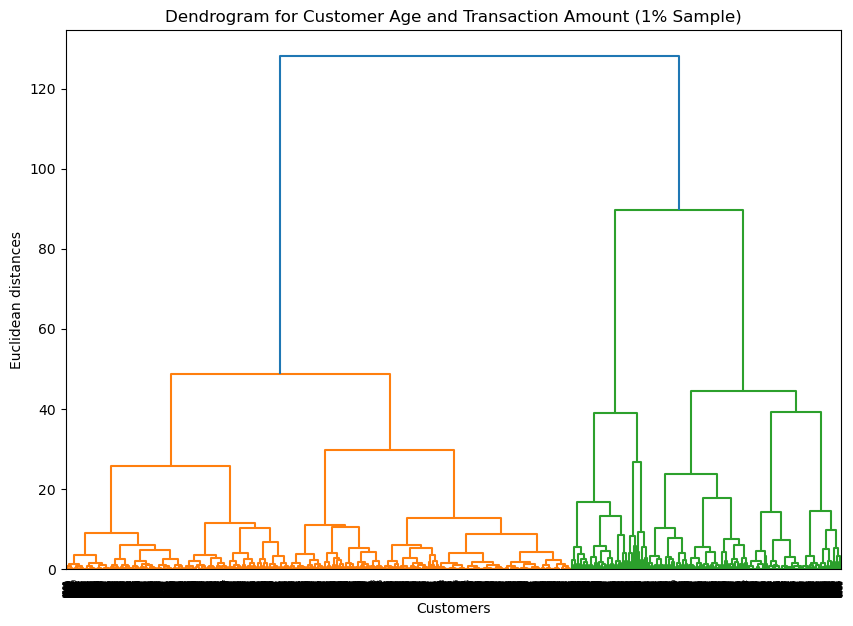

In [50]:
# Dendrogram for Customer Age and Transaction Amount
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_age_transaction_sample, method='ward'))
plt.title('Dendrogram for Customer Age and Transaction Amount (1% Sample)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



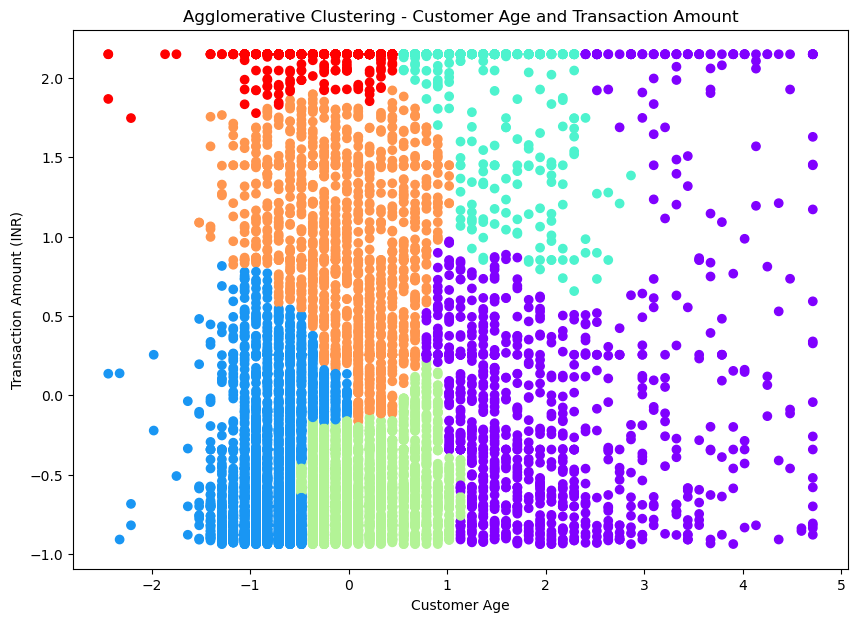

In [53]:
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters
optimal_clusters = 6

# Apply Agglomerative Clustering on a subset
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(sampled_df[['CustomerAge', 'TransactionAmount (INR)']])

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(sampled_df['CustomerAge'], sampled_df['TransactionAmount (INR)'], c=cluster_labels, cmap='rainbow')
plt.title('Agglomerative Clustering - Customer Age and Transaction Amount')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount (INR)')
plt.show()

